<Figure size 1500x1000 with 0 Axes>

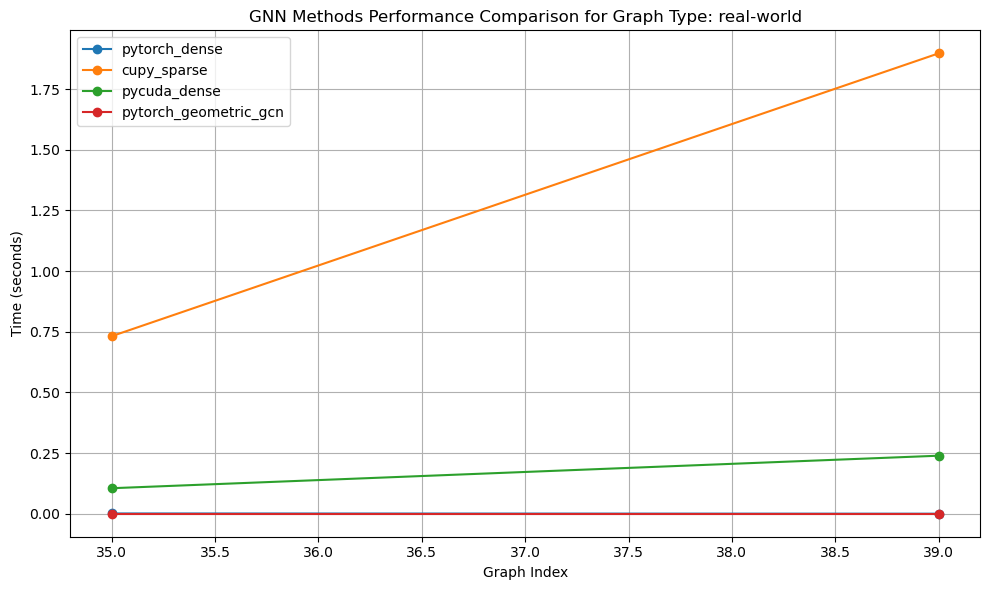

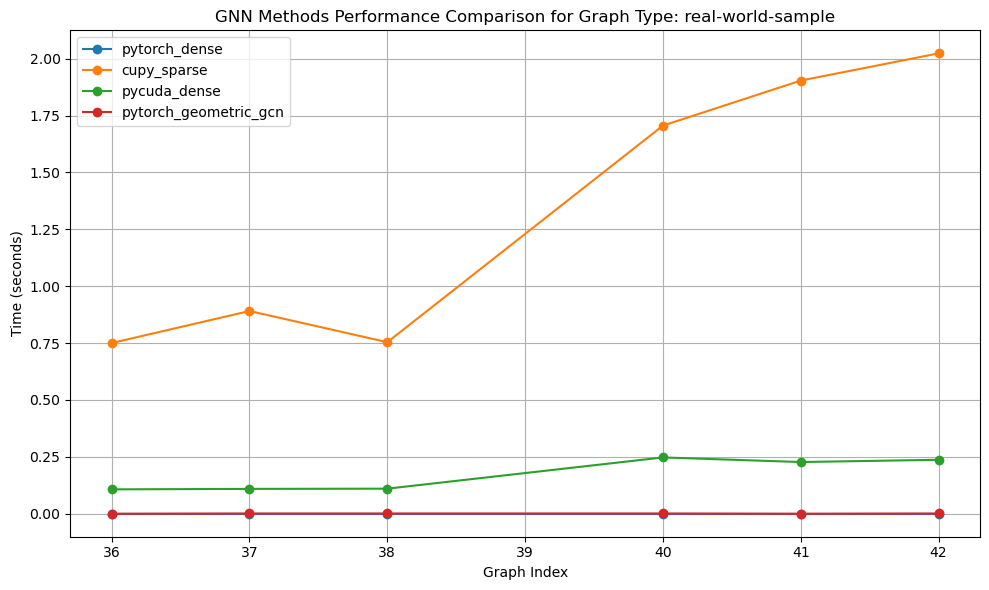

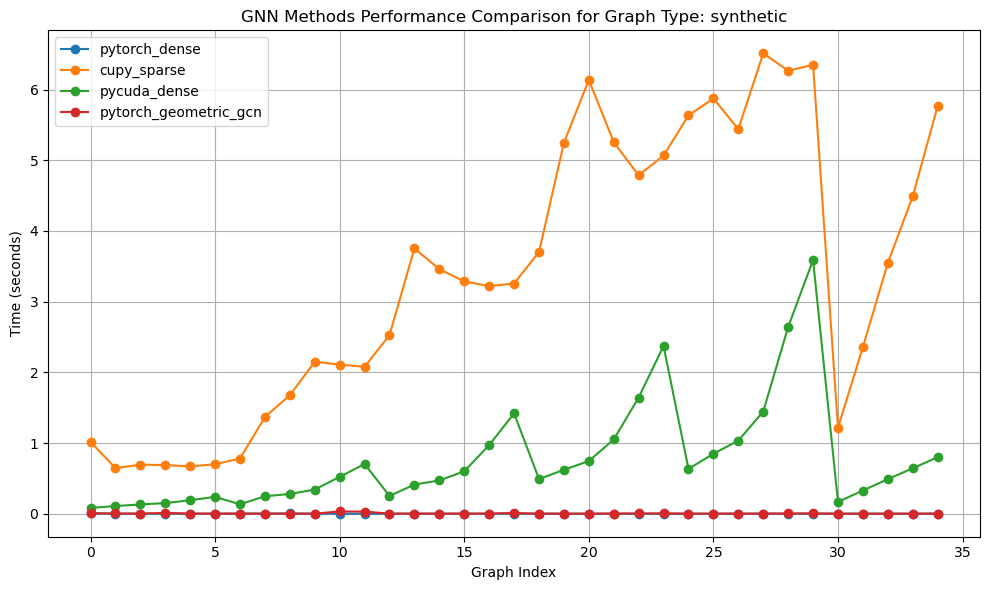

In [6]:
import json
import matplotlib.pyplot as plt
import numpy as np

# Load results
with open('gnn_results.json', 'r') as f:
    results = json.load(f)

# Extract data for plotting
methods = list(set(result['method'] for result in results))
graph_indices = sorted(set(result['graph_index'] for result in results))

# Extract graph properties for labeling
graph_properties = {result['graph_index']: (result['graph_name'], result['graph_type'], result.get('num_nodes'), result.get('sparsity')) for result in results}
method_times = {method: [] for method in methods}

for graph_index in graph_indices:
    for method in methods:
        times = [result['time_seconds'] for result in results if result['graph_index'] == graph_index and result['method'] == method]
        if times:
            method_times[method].append(times[0])
        else:
            method_times[method].append(np.nan)  # Use NaN for missing data

# Plot the results for each graph type separately
unique_graph_types = set(prop[1] for prop in graph_properties.values())
plt.figure(figsize=(15, 10))

for graph_type in unique_graph_types:
    plt.figure(figsize=(10, 6))
    for method in methods:
        filtered_indices = [index for index in graph_indices if graph_properties[index][1] == graph_type]
        times = [method_times[method][graph_indices.index(index)] for index in filtered_indices]
        plt.plot(filtered_indices, times, marker='o', label=method)
    plt.xlabel('Graph Index')
    plt.ylabel('Time (seconds)')
    plt.title(f'GNN Methods Performance Comparison for Graph Type: {graph_type}')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

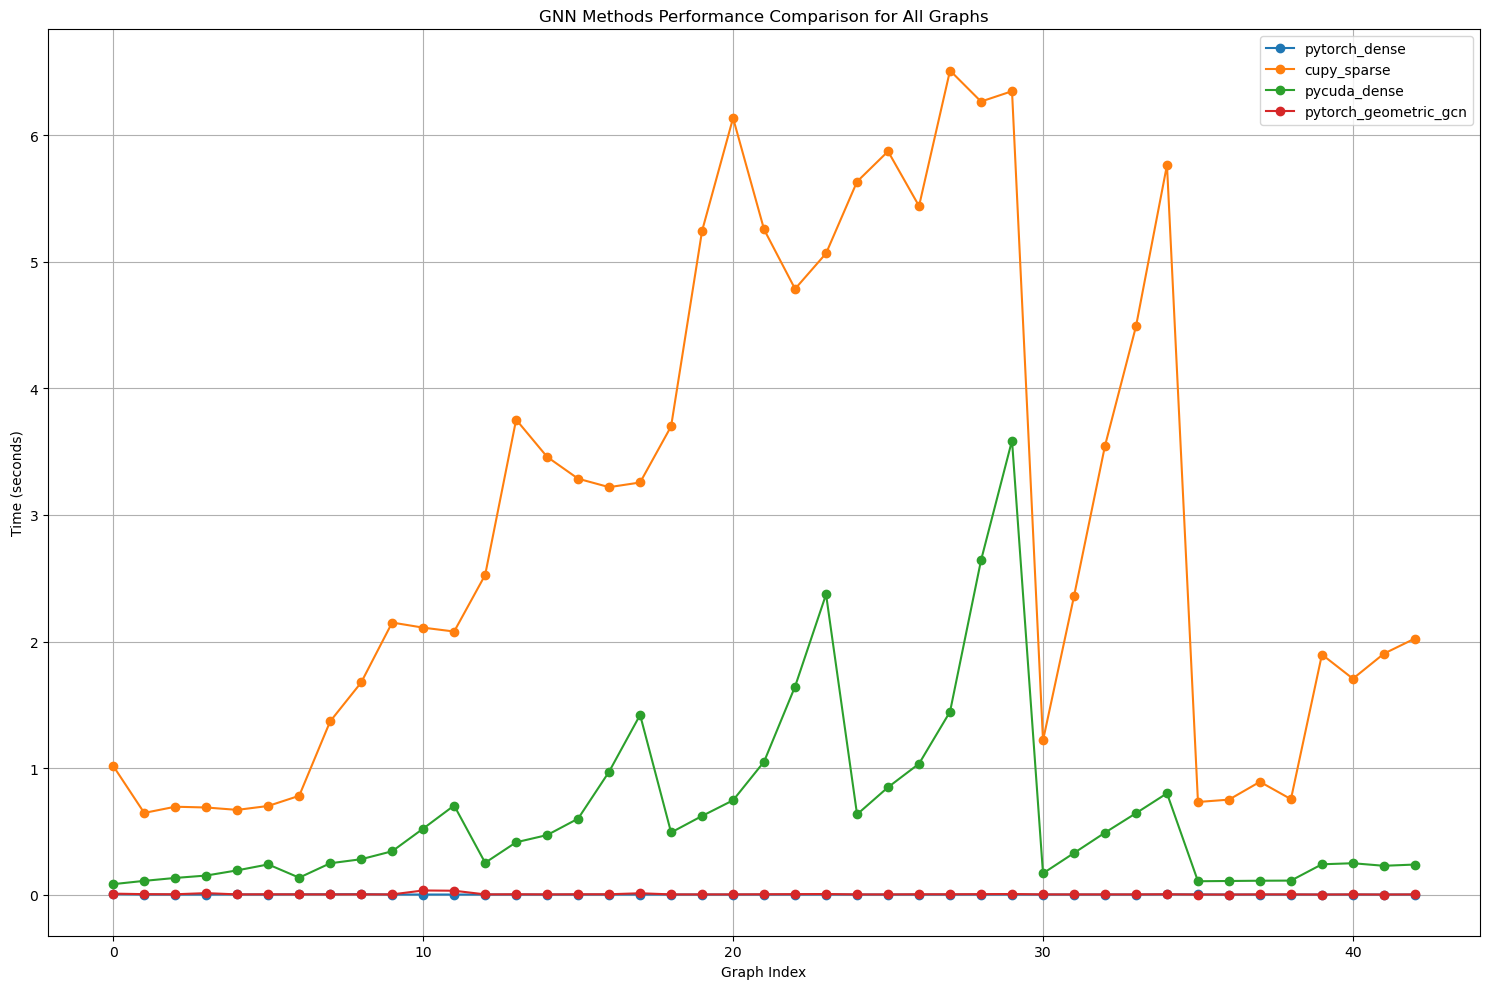

In [7]:

# Plot the results for all graphs together
plt.figure(figsize=(15, 10))
for method in methods:
    plt.plot(graph_indices, method_times[method], marker='o', label=method)

plt.xlabel('Graph Index')
plt.ylabel('Time (seconds)')
plt.title('GNN Methods Performance Comparison for All Graphs')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

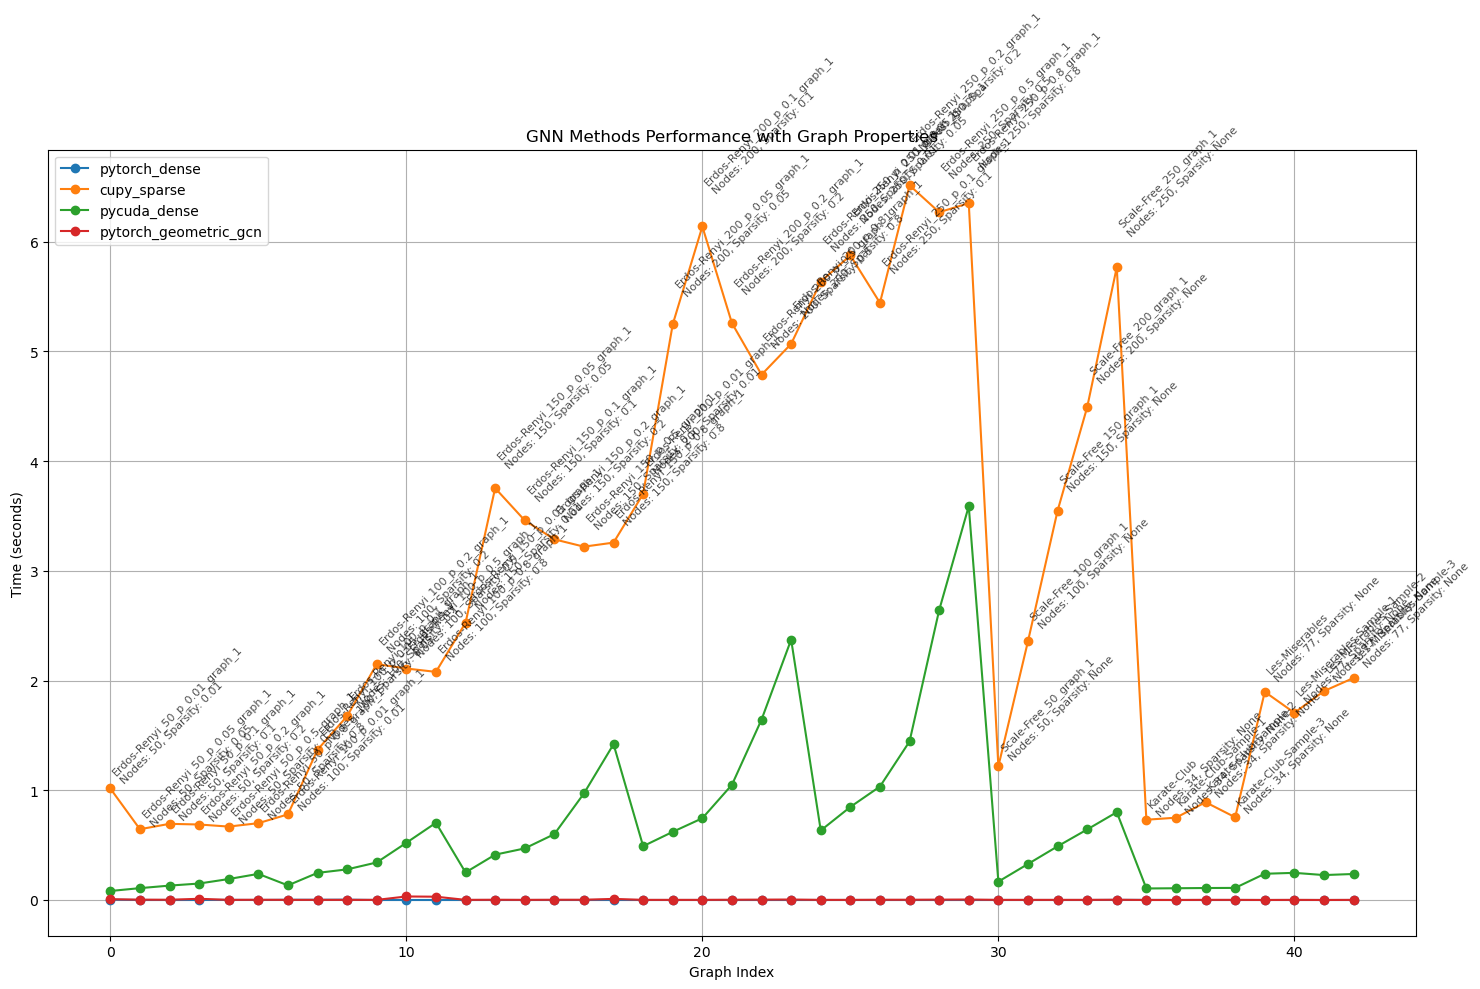

In [8]:

# Plot the results with additional properties annotated
plt.figure(figsize=(15, 10))
for method in methods:
    plt.plot(graph_indices, method_times[method], marker='o', label=method)

for graph_index in graph_indices:
    name, graph_type, num_nodes, sparsity = graph_properties[graph_index]
    plt.annotate(f'{name}\nNodes: {num_nodes}, Sparsity: {sparsity}', (graph_index, max([method_times[method][graph_indices.index(graph_index)] for method in methods if not np.isnan(method_times[method][graph_indices.index(graph_index)])]) * 1.05), rotation=45, fontsize=8, alpha=0.7)

plt.xlabel('Graph Index')
plt.ylabel('Time (seconds)')
plt.title('GNN Methods Performance with Graph Properties')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()